In [1]:

import numpy as np
import pandas as pd
     

In [2]:

df = pd.read_csv("C:/Users/vedul/Downloads/spam.csv", encoding='ISO-8859-1')

In [3]:
df.sample(5)
     
    

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2778,spam,For ur chance to win a å£250 cash every wk TXT...,NaN,NaN,NaN
5069,spam,5p 4 alfie Moon's Children in need song on ur ...,NaN,NaN,NaN
3805,spam,URGENT! We are trying to contact you. Last wee...,NaN,NaN,NaN
1444,ham,Those ducking chinchillas,NaN,NaN,NaN
4279,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN


In [4]:
df.shape
     

(5572, 5)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2263,spam,Not heard from U4 a while. Call 4 rude chat pr...
3664,ham,Ha... U jus ate honey ar? So sweet...
4526,ham,Understand. his loss is my gain :) so do you w...
3857,ham,R u still working now?
723,ham,Ya even those cookies have jelly on them


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)
     

,target,text
4834,ham,"OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I..."
2755,ham,We r outside already.
3300,spam,RCT' THNQ Adrian for U text. Rgds Vatian
577,ham,ÌÏ wait 4 me in sch i finish ard 5..
745,ham,Dunno he jus say go lido. Same time 930.


In [9]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:


df['target']=encoder.fit_transform(df['target'])

In [11]:

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:

df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:

df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

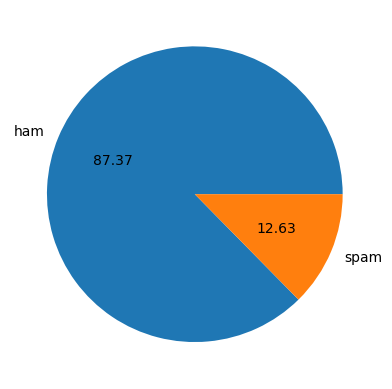

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:

import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vedul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:

df['num_characters']=df['text'].apply(len)

In [23]:
df.head()
     

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:

df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:

df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
     

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:

# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()
     

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:

import seaborn as sns
     

<Axes: xlabel='num_characters', ylabel='Count'>

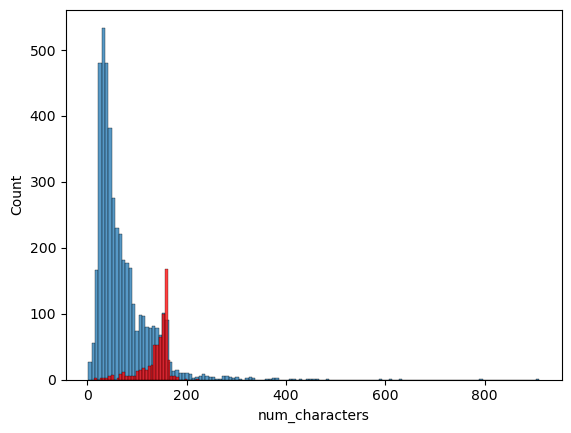

In [32]:

sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
     

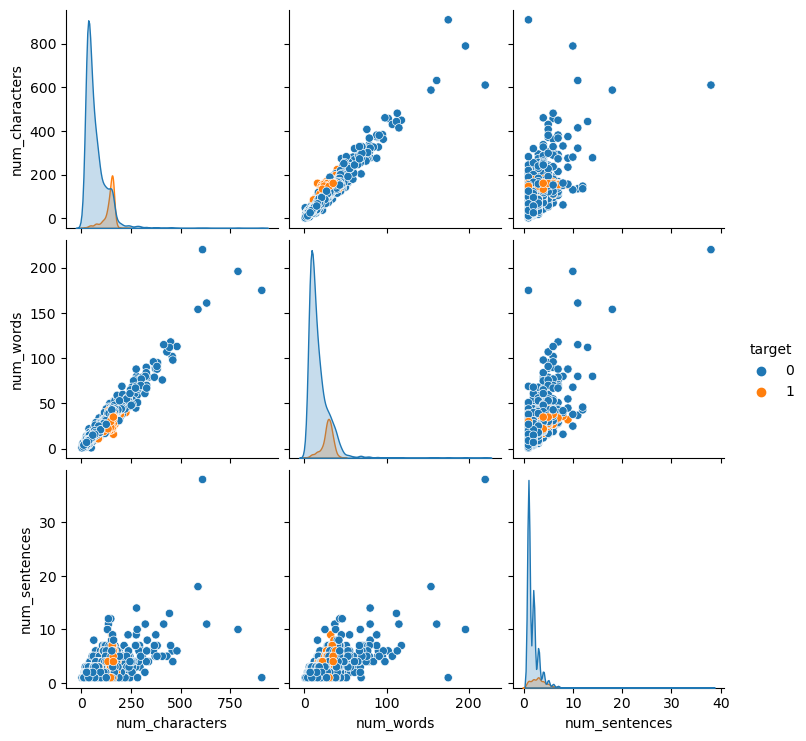

In [33]:

sns.pairplot(df,hue='target')

C:\Users\vedul\AppData\Local\Temp\ipykernel_13132\529717881.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

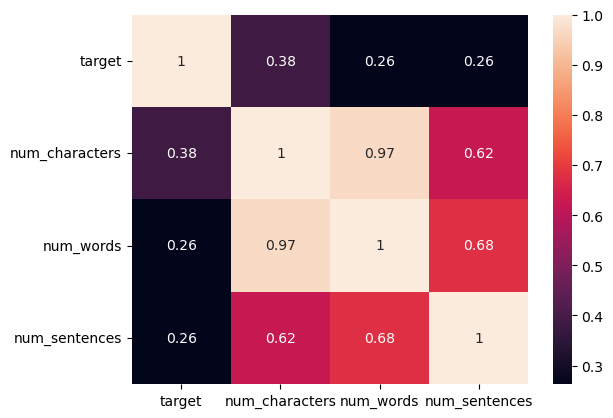

In [34]:

sns.heatmap(df.corr(),annot=True)

In [35]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
transform_text('Hi how Are YOU nitish?Dance')

'hi nitish danc'

In [37]:

df['transformed_text']=df['text'].apply(transform_text)

In [38]:
df.head()
     

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

In [42]:

spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:

len(spam_corpus)

9939

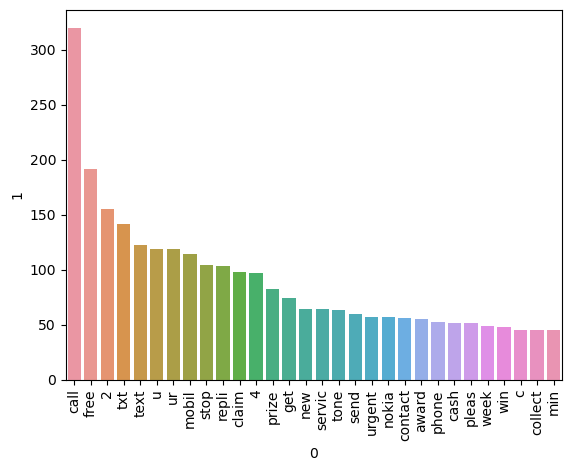

In [44]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
     


In [46]:
len(ham_corpus)

35404

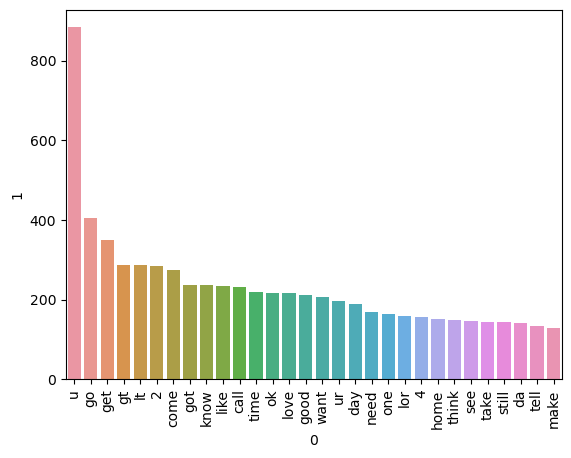

In [47]:

from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [51]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [53]:
x=tfidf.fit_transform(df['transformed_text']).toarray()
     
x.shape
     

(5169, 3000)

In [54]:

y=df['target'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
     

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [60]:

gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred1))
print('Confusion matrix:',confusion_matrix(y_test,y_pred1))
print('Precision score:',precision_score(y_test,y_pred1))

Accuracy: 0.8694390715667312
Confusion matrix: [[788 108]
 [ 27 111]]
Precision score: 0.5068493150684932


In [61]:

bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred3))
print('Confusion matrix:',confusion_matrix(y_test,y_pred3))
print('Precision score:',precision_score(y_test,y_pred3))

Accuracy: 0.9835589941972921
Confusion matrix: [[895   1]
 [ 16 122]]
Precision score: 0.991869918699187
